In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
cardio = pd.read_csv("../../results/vary-dim/run-003/cardio.csv").groupby(["n_features"]).mean().reset_index()
musk = pd.read_csv("../../results/vary-dim/run-003/musk.csv").groupby(["n_features"]).mean().reset_index()
thyroid = pd.read_csv("../../results/vary-dim/run-003/thyroid.csv").groupby(["n_features"]).mean().reset_index()
wbc = pd.read_csv("../../results/vary-dim/run-003/wbc.csv").groupby(["n_features"]).mean().reset_index()

In [95]:
cmap = plt.get_cmap("Set1")
colors = cmap.colors

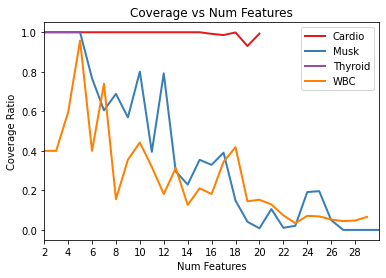

In [96]:
# coverage
plt.figure()
plt.plot(cardio.n_features, cardio.coverage_ratio, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.coverage_ratio, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.coverage_ratio, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.coverage_ratio, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Coverage Ratio")
plt.title("Coverage vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 30])
plt.xticks(range(2, 30, 2))
plt.savefig("coverage_nfeatures.png")

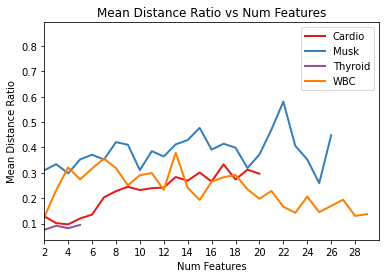

In [97]:
# distance
plt.figure()
plt.plot(cardio.n_features, cardio.mean_distance, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.mean_distance, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.mean_distance, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.mean_distance , label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Mean Distance Ratio")
plt.title("Mean Distance Ratio vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 30])
plt.xticks(range(2, 30, 2))
plt.savefig("distance_nfeatures.png")

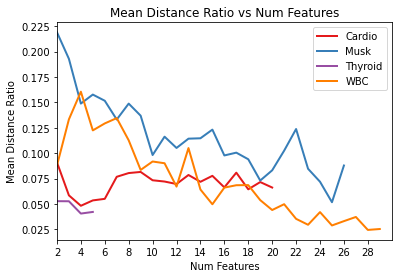

In [98]:
# distance
plt.figure()
plt.plot(cardio.n_features, cardio.mean_distance / np.sqrt(cardio.n_features), label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.mean_distance / np.sqrt(musk.n_features), label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.mean_distance / np.sqrt(thyroid.n_features), label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.mean_distance / np.sqrt(wbc.n_features), label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Mean Distance Ratio")
plt.title("Mean Distance Ratio vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 30])
plt.xticks(range(2, 30, 2))
plt.savefig("distance_ratio_nfeatures.png")

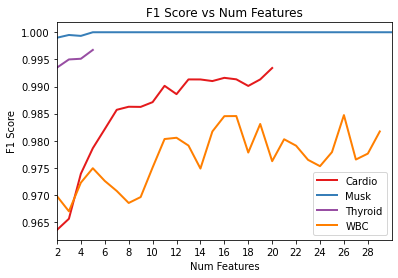

In [99]:
# f1 score
plt.figure()
plt.plot(cardio.n_features, cardio.f1, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.f1, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.f1, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.f1, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Num Features")
plt.legend(loc="best")
plt.xlim([2, 30])
plt.xticks(range(2, 30, 2))
plt.savefig("f1_nfeatures.png")